In [1]:
import sys
sys.path.append('..')
from settings import *
from fermiqp.lattice import *
import matplotlib.colors as colors

from fermiqp_style import set_theme
set_theme()

# Sheet trap 

This document contains code for the planning of our sheet trap. We also look at different options, e.g. an additional vertical lattice which we could also use for bi-layer imaging.

## Benchmarking Liyang's code against my own 

In my mathematica notebook I get 60uK depths for a single beam power of 3W and a 40um waist. And a radial trap frequency of 2.3kHz and an axial trap frequency of 14kHz. The trap frequencies here are within 10%, but the trap depths is higher here by 15%. This might be due to my code neglecting the counter rotating term. 

In [3]:
U = power2freq(power=3,
               waist=40e-6,
               wavelen=1.064e-6)
trap = DipoleTrap(40e-6,1.064e-6,U)

print('Lattice depth (uK): ')
print(freq2temp(U)*1e6)
print('Radial trap freq (Hz): ')
print(trap.trap_freq(U,axis='radial'))
print('Axial trap freq (Hz): ')
print(trap.trap_freq(U,axis='axial'))


Lattice depth (uK): 
72.26222367303576
Radial trap freq (Hz): 
[2510.4494403506856, 94377.79850942426]
Axial trap freq (Hz): 
2.123368325596018e+16


# Benchmarking sheet trap with Lucas calcs

In [4]:
power=12
waist_horizontal=90e-6
waisty_vertical=4e-6
wavelen=1.064e-6
U = power2freq(power=power,
               waist=waist_horizontal,
               waisty=waisty_vertical,
               wavelen=wavelen)
print(U)
trap = DipoleTrap(waist=waist_horizontal,
                  waisty=waisty_vertical,
                  wavelen=wavelen,
                  U=U)

print('Lattice depth (uK): ')
print(freq2temp(U)*1e6)
print('Radial trap freq (Hz): ')
print(trap.trap_freq(U,axis='radial'))
print('Axial trap freq (Hz): ')
print(trap.trap_freq(U,axis='axial'))


26739565.9242606
Lattice depth (uK): 
1284.6617541873027
Radial trap freq (Hz): 
[4704.43744130559, 105849.84242937579]
Axial trap freq (Hz): 
4481.184564819971


In [5]:
omega0 = 2*pi*446.799677e12
omega = 2*pi*c/trap.wavelen

correction = 1/(1/(omega0-omega) + 1/(omega0+omega))*(1/(omega0-omega))
U_uncorrected = trap.U*correction

print(correction)
print(U_uncorrected)
print(np.asarray(trap.trap_freq(U,axis='radial'))*np.sqrt(correction))


0.8153088995489229
21801006.06812479
[ 4247.84625049 95576.54063611]


# Parameters for our sheet trap

In [6]:
power=12
waist_horizontal=90e-6
waisty_vertical=3.9e-6
wavelen=1.064e-6
U = power2freq(power=power,
               waist=waist_horizontal,
               waisty=waisty_vertical,
               wavelen=wavelen)
print(U)
trap = DipoleTrap(waist=waist_horizontal,
                  waisty=waisty_vertical,
                  wavelen=wavelen,
                  U=U)

print('Lattice depth (uK): ')
print(freq2temp(U)*1e6)
print('Radial trap freq (Hz): ')
print(trap.trap_freq(U,axis='radial'))
print('Axial trap freq (Hz): ')
print(trap.trap_freq(U,axis='axial'))


27425195.819754463
Lattice depth (uK): 
1317.6017991664642
Radial trap freq (Hz): 
[4764.3689967925275, 109946.97684905835]
Axial trap freq (Hz): 
4773.986763691779


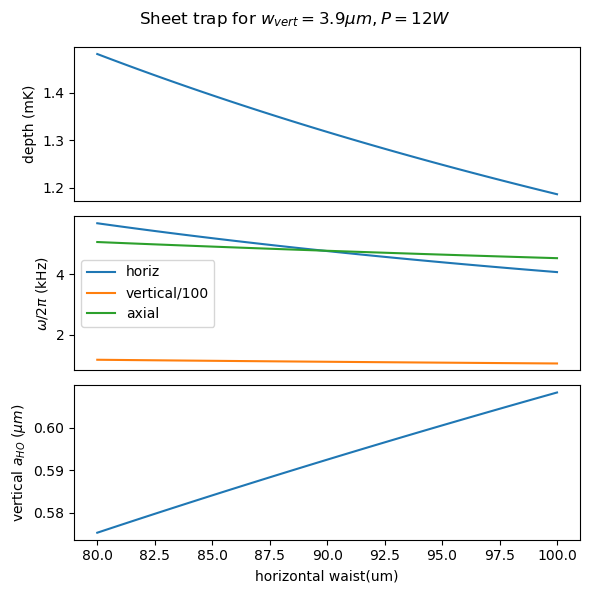

In [20]:
power=12
waisty_vertical=3.9e-6
wavelen=1.064e-6
waist_hor = np.linspace(80,100,100)*1e-6

U = power2freq(power=power, 
               waist = waist_hor,
               waisty=waisty_vertical)
trap = DipoleTrap(waist=waist_hor,
                  waisty=waisty_vertical,
                  wavelen=1.064e-6,
                  U=U)

fig, axs = plt.subplots(3,1,figsize=(6,6))
axs[0].plot(waist_hor*1e6,freq2temp(U)*1e3)
axs[1].plot(waist_hor*1e6,
            trap.trap_freq(unit='Hz',axis='radial')[0]/1e3,
            label='horiz')
axs[1].plot(waist_hor*1e6,
            trap.trap_freq(unit='Hz',axis='radial')[1]/100/1e3,
            label='vertical/100')
axs[1].plot(waist_hor*1e6,
            trap.trap_freq(unit='Hz',axis='axial')/1e3,
            label='axial')
axs[0].set_ylabel('depth (mK)')
axs[2].set_xlabel('horizontal waist(um)')
axs[1].set_ylabel(r'$\omega/2\pi$ (kHz)')
axs[1].legend()

axs[0].set_xticks([])
axs[1].set_xticks([])

# for a_ho in trap.a_ho(U=U):
#     axs[2].plot(waist_hor*1e6,
#             a_ho*1e6,
#             label='axial')
axs[2].plot(waist_hor*1e6,
             trap.a_ho(U=U)[2]*1e6,
             label='axial')
axs[2].set_ylabel(r'vertical $a_{HO}$ ($\mu m$)')
plt.suptitle(r'Sheet trap for $w_{vert} = '+str(np.round(waisty_vertical*1e6,2))+ '\mu m, P='+
             str(np.round(power,2))+ 'W$')
plt.tight_layout()


In [7]:
Isat = 5.72e-3/(1e-4)
P=45e-3
w=800e-6
I=2*P/(np.pi*w**2)

print('I/Isat')
print(I/Isat)

print('\nSingle photon Omega_R/2pi (MHz)')
rabi = 2*np.pi*5.9e6*np.sqrt(I/2/Isat)
print(rabi/(2*np.pi)/1e6)

print('\nTwo-photon Rabi Omega_R/2pi (MHz)')
print(rabi**2/(2*2*np.pi*6e9)/(2*np.pi)/1e6)

I/Isat
782.5581773530693

Single photon Omega_R/2pi (MHz)
116.70657683622704

Two-photon Rabi Omega_R/2pi (MHz)
1.1350354230691804


In [8]:
wvl =671e-9
mass = 6*1.67e-27
hplanck = 6.63e-34
kB = 1.38e-23

Er = hplanck**2/(2*mass*wvl**2)
print(Er/kB)
print(Er/hplanck)

3.5302479773913266e-06
73480.27464253441


# Lattice from interference under an angle

In [9]:
lattice_angle = OpticalLatticeAngle(waist=90e-6,
                                    waisty=90e-6,
                                    half_angle=5,
                                    power=12,
                                    wavelen=1.064e-6)

print('Er in Hz:')
print(lattice_angle.Er)

print('Lattice depth in Hz:')
print(lattice_angle.U)

print('Lattice depth in Er:')
print(lattice_angle.U/lattice_angle.Er)

print('Lattice depth in K:')
print(freq2temp(lattice_angle.U))

print('On site frequency in Hz:')
print(lattice_angle.on_site_freq())



Er in Hz:
221.98548185887967
Lattice depth in Hz:
1
Lattice depth in Er:
0.004504799104996059
Lattice depth in K:
4.804347826086956e-11
On site frequency in Hz:
29.798354441739207


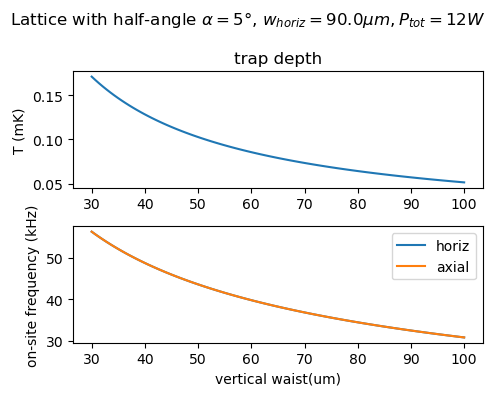

In [10]:
tot_power = 12
waist_horizontal=90e-6
waisty_vertical=90e-6
half_angle=5
power=12
wavelen=1.064e-6

waisty_vertical= np.linspace(30,100,100)*1e-6

U = power2freq(power=tot_power, 
               waist = waist_horizontal,
               waisty=waisty_vertical)

lattice_angle = OpticalLatticeAngle(waist=waist_horizontal,
                                    waisty=waisty_vertical,
                                    half_angle=half_angle,
                                    power=tot_power,
                                    wavelen=wavelen,U=U)


fig, axs = plt.subplots(2,1,figsize=(5,4))
axs[0].plot(waisty_vertical*1e6,freq2temp(U)*1e3)
axs[1].plot(waisty_vertical*1e6,
            lattice_angle.on_site_freq(unit='Hz')/1e3,
            label='horiz')

axs[1].plot(waisty_vertical*1e6,
            lattice_angle.on_site_freq(unit='Hz')/1e3,
            label='axial')
axs[0].set_ylabel('T (mK)')
axs[1].set_xlabel('vertical waist(um)')
axs[1].set_ylabel('on-site frequency (kHz)')
axs[0].set_title('trap depth')
axs[1].legend()
plt.suptitle(r'Lattice with half-angle $\alpha=5\degree$, $w_{horiz} = '+str(np.round(waist_horizontal*1e6,2))+ '\mu m, P_{tot}='+
             str(np.round(tot_power,2))+ 'W$')
plt.tight_layout()


In [12]:
lattice_angle = OpticalLatticeAngle(waist=100e-6,
                                    waisty=200e-6,
                                    half_angle=5,
                                    power=4,
                                    wavelen=1.064e-6)

print('Er in Hz:')
print(lattice_angle.Er)

print('Lattice depth in Hz:')
print(lattice_angle.U)

print('Lattice depth in Er:')
print(lattice_angle.U/lattice_angle.Er)

print('Lattice depth in K:')
print(freq2temp(lattice_angle.U))

print('On site frequency in Hz:')
print(lattice_angle.on_site_freq())



Er in Hz:
221.98548185887967
Lattice depth in Hz:
1
Lattice depth in Er:
0.004504799104996059
Lattice depth in K:
4.804347826086956e-11
On site frequency in Hz:
29.798354441739207


In [13]:
lattice_angle.a_ho()*1e9
lattice_angle.on_site_freq()
lattice_angle.t()


7.616727484309647

In [ ]:
lattice_angle